In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import svm, datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
# Overall Data
PData = pd.read_csv(r"C:\Users\thuyd\Desktop\bootcamp\Project 2\Dataset v1\Updated Battery related publication dataset_DNedited.csv")
# Unique Publisher Data
UData = pd.read_csv(r"C:\Users\thuyd\Desktop\bootcamp\Project 2\Dataset v1\Grouped unique publisher citations sum.csv")
# EV Car Sales Data
SData = pd.read_csv(r"C:\Users\thuyd\Desktop\bootcamp\Project 2\Dataset v1\EVSales_Edited.csv")
# Unique Publisher Data - Sorted
USrtData = pd.read_csv(r"C:\Users\thuyd\Desktop\bootcamp\Project 2\Dataset v1\Groupedsortedimpacted_publisher_citations_sum.csv")

In [3]:
# Citations Column: Unique
Ci_sum = UData.iloc[0:,3].values
Ci_years = UData.iloc[0:,1].values

# Citations full data - options
Ci_P_years = PData.iloc[0:,1].values
Ci_P = PData.iloc[0:,0].values
Ci_SEI = PData.iloc[0:,6].values
Ci_cathode = PData.iloc[0:,7].values
Ci_anode = PData.iloc[0:,8].values
Ci_efficiency = PData.iloc[0:,9].values
Ci_electrode = PData.iloc[0:,10].values

# EV Sales Column
Sales_sum = SData.iloc[:,1].values
Sales_years = SData.iloc[:,0].values

# Citations - Publishers unique and sorted
USrtData_years = USrtData.iloc[:,1].values
USrtData_Ci = USrtData.iloc[:,3].values
USrtData_P = USrtData.iloc[:,2]

#Sales_years.size for size
# Lag_N is assigned publishcation lag

Lag_N = 2

In [4]:
# Citations of all publishers by years
j = 0 #index
k = 1997 #beginning of the data, end year will have to minus (Lag_N - 1) to account for the publishcation lag
yearsum = 0
Ci_by_year = np.array([])
for i in Ci_years:
    if i == k:
        yearsum = yearsum + Ci_sum[j]
    elif i == 2019:
        break
    else:
        Ci_by_year = np.append(Ci_by_year, yearsum)
        k = k + 1
        yearsum = 0
        yearsum = yearsum + Ci_sum[j]
    j = j + 1
    
# Conditions can be changed later

Ci_by_year

array([ 3819., 11862., 12632., 18320., 25058., 23792., 24569., 27065.,
       31693., 42911., 37763., 55467., 22914., 36535., 36645., 48879.,
       46804., 41621., 28485., 26364., 22815.])

In [5]:
# Citations of all publishers that satisfies the first condition, "SEI", by years
j = 0 #index
k = 1997 
yearsum_SEI = 0
Ci_by_year_SEI = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_SEI[j] == 1:
            yearsum_SEI = yearsum_SEI + Ci_P[j]
    elif i == 2019: #2019 is cut off point because the lag is 2 years
        break
    else:     
        Ci_by_year_SEI = np.append(Ci_by_year_SEI, yearsum_SEI)
        k = k + 1
        yearsum_SEI = 0
    j = j + 1
    
#Ci_P_years = PData.iloc[0:,1].values
#Ci_P = PData.iloc[0:,0].values
#Ci_SEI = PData.iloc[0:,6].values

Ci_by_year_SEI

array([  787.,  1641.,  3726.,  1612.,  7802.,  6552., 10066., 11204.,
        8870., 13445.,  9248., 18696.,  8891.,  7978., 11396., 17777.,
       13182., 15891., 12775., 10504., 10945.])

In [6]:
#Ci_cathode = PData.iloc[0:,7].values
#Ci_anode = PData.iloc[0:,8].values
#Ci_efficiency = PData.iloc[0:,9].values
#Ci_electrode = PData.iloc[0:,10].values

# Citations of all publishers that satisfies the second condition, "cathode", by years
j = 0 #index
k = 1997 
yearsum_cathode = 0
Ci_by_year_cathode = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_cathode[j] == 1:
            yearsum_cathode = yearsum_cathode + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_cathode = np.append(Ci_by_year_cathode, yearsum_cathode)
        k = k + 1
        yearsum_cathode = 0
    j = j + 1
Ci_by_year_cathode

array([ 183.,  870.,  469.,  309., 5194., 3572., 2250., 4260., 3508.,
       5101., 4951., 7281., 2912., 2688., 6110., 4432., 3738., 6025.,
       1322., 2344.,  998.])

In [7]:
# Citations of all publishers that satisfies the third condition, "anode", by years
j = 0 #index
k = 1997 
yearsum_anode = 0
Ci_by_year_anode = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_anode[j] == 1:
            yearsum_anode = yearsum_anode + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_anode = np.append(Ci_by_year_anode, yearsum_anode)
        k = k + 1
        yearsum_anode = 0
    j = j + 1
Ci_by_year_anode

array([  635.,  1832.,  2120., 10557.,  6234.,  4739.,  6302.,  7046.,
        5533.,  8163.,  9283., 23874.,  7347., 13253., 12133., 22359.,
       12598., 19490.,  8078., 10425., 11915.])

In [8]:
# Citations of all publishers that satisfies the fourth condition, "efficiency", by years
j = 0 #index
k = 1997 
yearsum_efficiency = 0
Ci_by_year_efficiency = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_efficiency[j] == 1:
            yearsum_efficiency = yearsum_efficiency + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_efficiency = np.append(Ci_by_year_efficiency, yearsum_efficiency)
        k = k + 1
        yearsum_cathode = 0
    j = j + 1
Ci_by_year_efficiency 

array([    0.,     0.,    49.,    49.,   225.,   232.,   270.,   871.,
         871.,  1118.,  1874.,  2620.,  3283.,  3439.,  5436.,  8575.,
       11354., 11770., 13572., 14368., 16206.])

In [9]:
# Citations of all publishers that satisfies the second condition, "electrode", by years
j = 0 #index
k = 1997 
yearsum_electrode = 0
Ci_by_year_electrode = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_electrode[j] == 1:
            yearsum_electrode = yearsum_electrode + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_electrode = np.append(Ci_by_year_electrode, yearsum_electrode)
        k = k + 1
        yearsum_electrode = 0
    j = j + 1
Ci_by_year_electrode

array([ 1230.,  2161.,  3380., 10308.,  5795.,  7108.,  4616.,  8598.,
        5693., 11643., 11843., 13625.,  4507.,  7465.,  6554., 15371.,
        7112.,  7361.,  6705.,  4009.,  4021.])

In [10]:
# Citations of all publishers that satisfies all the conditions, by years
j = 0 #index
k = 1997 
yearsum_all = 0
Ci_by_year_all = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_efficiency[j] == 1 and Ci_electrode[j] == 1:
            yearsum_all = yearsum_all + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_all = np.append(Ci_by_year_all, yearsum_all)
        k = k + 1
        yearsum_all = 0
    j = j + 1
Ci_by_year_all

#Ci_SEI[j] == 1 and Ci_cathode[j] == 1 and Ci_anode[j] == 1 and Ci_efficiency[j] == 1 and Ci_electrode[j] == 1:

array([   0.,    0.,   48.,    0.,   60.,    0.,    0.,    0.,    0.,
          9.,   89.,  471.,  119.,    0.,  746., 1523.,  170.,  222.,
        136.,  310.,  416.])

In [11]:
# Total Citations vs EV Sales but 5 most influencing publisher only

#USrtData_years = USrtData.iloc[:,1].values
#USrtData_Ci = USrtData.iloc[:,3].values
#USrtData_P = USrtData.iloc[:,2]
# Citations of all publishers by years
j = 0 #index
k = 1997 #beginning of the data, end year will have to minus (Lag_N - 1) to account for the publishcation lag
l = 0 # index for most influential publisher
yearsum_5P = 0
Ci_by_year_5P = np.array([])
for i in USrtData_years:
    if i == k and l < 5:
        yearsum_5P = yearsum_5P + USrtData_Ci[j]
    elif i == 2018:
        break  
    elif i == k and l == 5:
        Ci_by_year_5P = np.append(Ci_by_year_5P, yearsum_5P)
        yearsum_5P = 0
    elif i > k:
        yearsum_5P = yearsum_5P + USrtData_Ci[j]
        k = k + 1
        l = 0
    j = j + 1
    l = l + 1
# Conditions can be changed later

Ci_by_year_5P

array([ 3564., 11036., 11735., 17070., 22078., 21639., 23795., 25157.,
       29734., 36222., 34395., 47382., 19595., 32623., 30934., 42813.,
       42468., 38574., 25135., 24045., 19013.])

In [12]:
# Recapping variables:
#y: EV Sales: Sales_sum
#x: Ci_by_year, Ci_by_year_SEI, Ci_by_year_cathode, Ci_by_year_anode, Ci_by_year_efficiency, Ci_by_year_electrode, 
# Ci_by_year_5P

In [13]:
# Linear model first
Ci_by_year_log = np.log10(Ci_by_year)
Sales_sum_log = np.log10(Sales_sum)
model_OA = LinearRegression().fit(Ci_by_year_log.reshape(-1, 1), Sales_sum_log.reshape(-1, 1))

In [14]:
yplot = model_OA.predict(Ci_by_year_log.reshape(-1, 1))

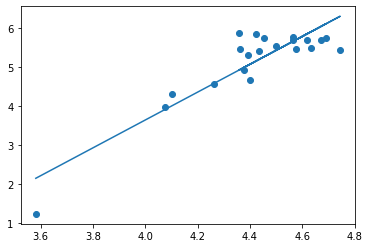

In [15]:
plt.plot(Ci_by_year_log.reshape(-1, 1), yplot)
plt.scatter(Ci_by_year_log, Sales_sum_log)
plt.show()

In [24]:
# trying log regression instead of linear - didnt work
#model_OA_L = LogisticRegression().fit(Ci_by_year.reshape(-1, 1), Sales_sum.reshape(-1, 1).ravel())
#yplot_L = model_OA_L.predict(Ci_by_year.reshape(-1, 1))

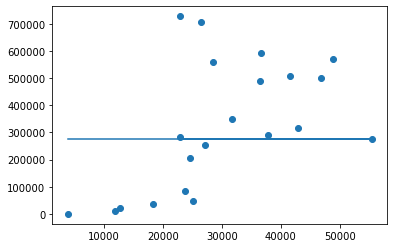

In [26]:
#plt.plot(Ci_by_year.reshape(-1, 1), yplot_L)
#plt.scatter(Ci_by_year, Sales_sum)
#plt.show()

#FINE I GI VE UP

In [31]:
# do a poly fit for effeciency paper
# plt.plot(np.log10(Ci_by_year_efficiency[2:]), np.log10(Sales_sum[2:]))
#polyf = PolynomialFeatures(degree = 3)
#linearf = LinearRegression()

#x_poly = polynomial_features.fit_transform(np.log10(Ci_by_year_efficiency[2:]))
#linearf.fit(x_poly, np.log10(Sales_sum[2:])
#y_poly_pred = linearf.predict(x_poly)

In [48]:
# Multivariable Regression
## Recapping variables:
#y: EV Sales: Sales_sum
#x: Ci_by_year, Ci_by_year_SEI, Ci_by_year_cathode, Ci_by_year_anode, Ci_by_year_efficiency, Ci_by_year_electrode, 
# Ci_by_year_5P
# Combining all the x's into one x df. not df. matrix.
all_x = np.stack((Ci_by_year, Ci_by_year_SEI, Ci_by_year_cathode, Ci_by_year_anode, Ci_by_year_efficiency, Ci_by_year_electrode, Ci_by_year_5P))
labels = ("By Years","Keyword: SEI","Keyword: Cathode","Keyword: Anode","Keyword: Efficiency","Keyword: Electrode","5 most popular publishers")


jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

In [ ]:
# def correlation(df, variables, n_rows, n_cols)
#     fig = plt.figure(figsize = (8,6))
#     for i, var in enumerate(variables)
#     ax = fig.add_subplot(n_rows, n_columns, i + 1)
#     asset = df.loc[:,var]
#     ax.scatter(df["EV Sales"], asset, )
# some function that creates multiple plots - not really important for now

In [72]:
combined_data = pd.DataFrame({'Total Citations per Year': Ci_by_year, 'Keyword_SEI': Ci_by_year_SEI, 'Keyword_cathode': Ci_by_year_cathode, 'Keyword_anode':Ci_by_year_anode, 'Keyword_Efficiency': Ci_by_year_efficiency, 'Keyword_electrode': Ci_by_year_electrode, 'Ci_5IPub': Ci_by_year_5P,'EV_Sales': Sales_sum})
MultiLinear = LinearRegression()

train = combined_data[combined_data.index < 15]
test = combined_data[combined_data.index >= 15]
X_train = train[["Total Citations per Year","Keyword_SEI","Keyword_cathode","Keyword_anode","Keyword_Efficiency","Keyword_electrode","Ci_5IPub"]]
Y_train = train[["EV_Sales"]]

In [75]:
MultiLinear.fit(X_train,Y_train)

LinearRegression()

In [77]:
X_test = test[["Total Citations per Year","Keyword_SEI","Keyword_cathode","Keyword_anode","Keyword_Efficiency","Keyword_electrode","Ci_5IPub"]].values
Y_test = test[["EV_Sales"]].values


In [85]:
predictions = MultiLinear.predict(X_test)
Mean_Error = sum(abs(predictions - Y_test))/test.shape[0]
Mean_Error
# Mean Error big :(
Mean_Error_avg = Mean_Error / np.average(Y_test)
Mean_Error_avg
# Mean Error_avg is not that big BUT what does that result even mean

array([1.31448633])

In [94]:
# have some plot idk

df = pd.DataFrame({'Actual': [Y_test], 'Predicted': [predictions]})
df
error = Y_test - predictions
error.plot(kind = 'bar',figsize = (8,6))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [88]:
Y_test

array([[571054],
       [498423],
       [506565],
       [558449],
       [704534],
       [727390]], dtype=int64)

In [89]:
predictions

array([[ 950691.2816349 ],
       [1419074.93538428],
       [1264990.43114814],
       [1505331.40223686],
       [1516315.91325634],
       [1598014.81661523]])